In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('Google_Stock_Price_Train.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
df = df.drop('Date', axis=1)

In [ ]:
df

,Open,High,Low,Close,Volume
0,325.25,332.83,324.97,663.59,"7,380,500"
1,331.27,333.87,329.08,666.45,"5,749,400"
2,329.83,330.75,326.89,657.21,"6,590,300"
3,328.34,328.77,323.68,648.24,"5,405,900"
4,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
1253,790.90,792.74,787.28,789.91,"623,400"
1254,790.68,797.86,787.66,791.55,"789,100"
1255,793.70,794.23,783.20,785.05,"1,153,800"
1256,783.33,785.93,778.92,782.79,"744,300"


In [11]:
df['Open'] = df['Open'].replace({',': ''}, regex=True).astype(float)
df['High'] = df['High'].replace({',': ''}, regex=True).astype(float)
df['Low'] = df['Low'].replace({',': ''}, regex=True).astype(float)
df['Close'] = df['Close'].replace({',': ''}, regex=True).astype(float)
df['Volume'] = df['Volume'].replace({',': ''}, regex=True).astype(float)

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0, 1))
x_scaled=sc.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])


In [12]:
X_train = []
y_train = []
for i in range(60, len(x_scaled)):
    X_train.append(x_scaled[i-60: i, 0])
    y_train.append(x_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
# Reshape X_train to be suitable for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

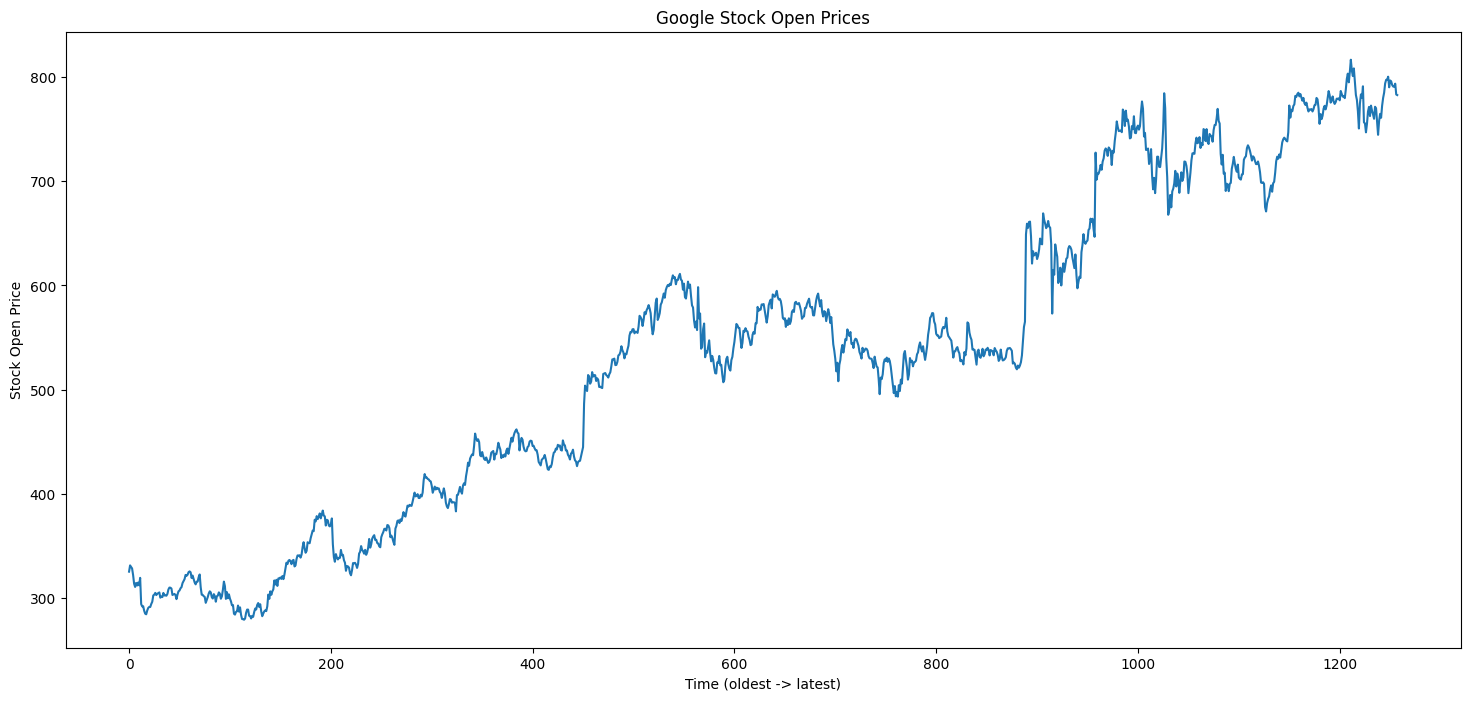

In [15]:
plt.figure(figsize=(18, 8))
plt.plot(df['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

regressor = Sequential()

# First LSTM layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

# Output Layer
regressor.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
regressor.compile(optimizer='adam', loss='mse',metrics=['mae'])

make epochs=100

In [19]:
regressor.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0045 - mae: 0.0506
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0044 - mae: 0.0507
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0039 - mae: 0.0459
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0047 - mae: 0.0502
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0041 - mae: 0.0479
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - loss: 0.0041 - mae: 0.0461
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.0043 - mae: 0.0482
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0044 - mae: 0.0484
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0036 - mae: 0.0444
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0035 - mae: 0.0426


In [20]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [25]:
# Combine train and test datasets
dataset_total = pd.concat((df['Open'], df_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values

In [26]:
# Reshape inputs to have 1 column
inputs = inputs.reshape(-1, 1)

# Scale input
inputs = sc.transform(inputs)

In [38]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

# Reshape X_test to match LSTM input shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape


(20, 60, 1)

In [39]:
y_test = []
for i in range(60, len(inputs)):
    y_test.append(inputs[i, 0])  # The next day's price after the 60-day window

y_test = np.array(y_test)

# Now verify the lengths of X_test and y_test
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

Length of X_test: 20
Length of y_test: 20


In [40]:
predicted_stock_price = regressor.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [41]:
# Inverse the scaling to get real price values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

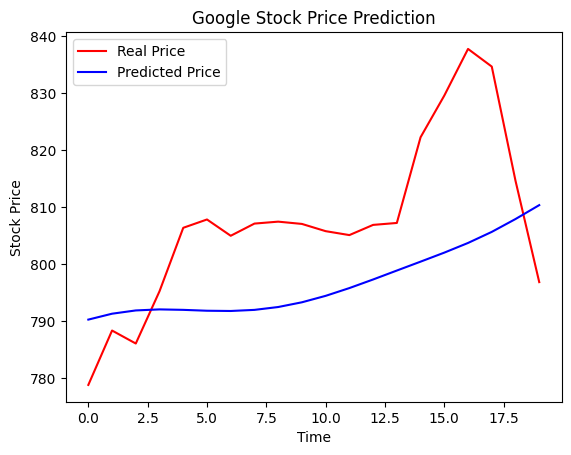

In [42]:
plt.plot(real_stock_price, color='red', label='Real Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [43]:
loss, mae = regressor.evaluate(X_test, y_test)

print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0763 - mae: 0.2393
Test Loss (MSE): 0.0763
Test MAE: 0.2393
